### Breast Cancer Data
##### 30개의 속성, 2개의 타겟(malignant, benign)

In [1]:
import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try: # Currently, memory growth needs to be the same across GPUs 
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e: # Memory growth must be set before GPUs have been initialized print(e)
        print(e)

1 Physical GPUs, 1 Logical GPUs


In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

print(tf.__version__)

2.4.0


In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [4]:
cancer= load_breast_cancer()
x_train, x_test, y_train, y_test=train_test_split(cancer.data,cancer.target,stratify=cancer.target,random_state=0)

print(dir(cancer))
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

['DESCR', 'data', 'feature_names', 'filename', 'frame', 'target', 'target_names']
(426, 30)
(426,)
(143, 30)
(143,)


In [5]:
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [6]:
print(cancer.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 0 1 1 0 

In [7]:
np.bincount(cancer.target)

array([212, 357], dtype=int64)

In [8]:
malignant=cancer.data[cancer.target==0]
benign=cancer.data[cancer.target==1]
_,bins=np.histogram(cancer.data[:,0],bins=20) # min_radius 가져오기 
print(bins)

[ 6.981    8.03745  9.0939  10.15035 11.2068  12.26325 13.3197  14.37615
 15.4326  16.48905 17.5455  18.60195 19.6584  20.71485 21.7713  22.82775
 23.8842  24.94065 25.9971  27.05355 28.11   ]


Text(0.5, 1.0, 'mean radius')

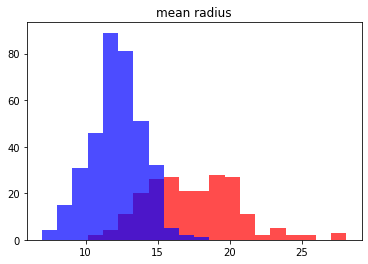

In [9]:
plt.hist(malignant[:,0],bins=bins,color='red',alpha=0.7)
plt.hist(benign[:,0],bins=bins,color='blue',alpha=0.7)
plt.title(cancer.feature_names[0])

# 결과 -> benign은 mean radius가 작다, malignant는 mean radius가 크다 -> mean_radius는 분류에 도움을 주는 피처임

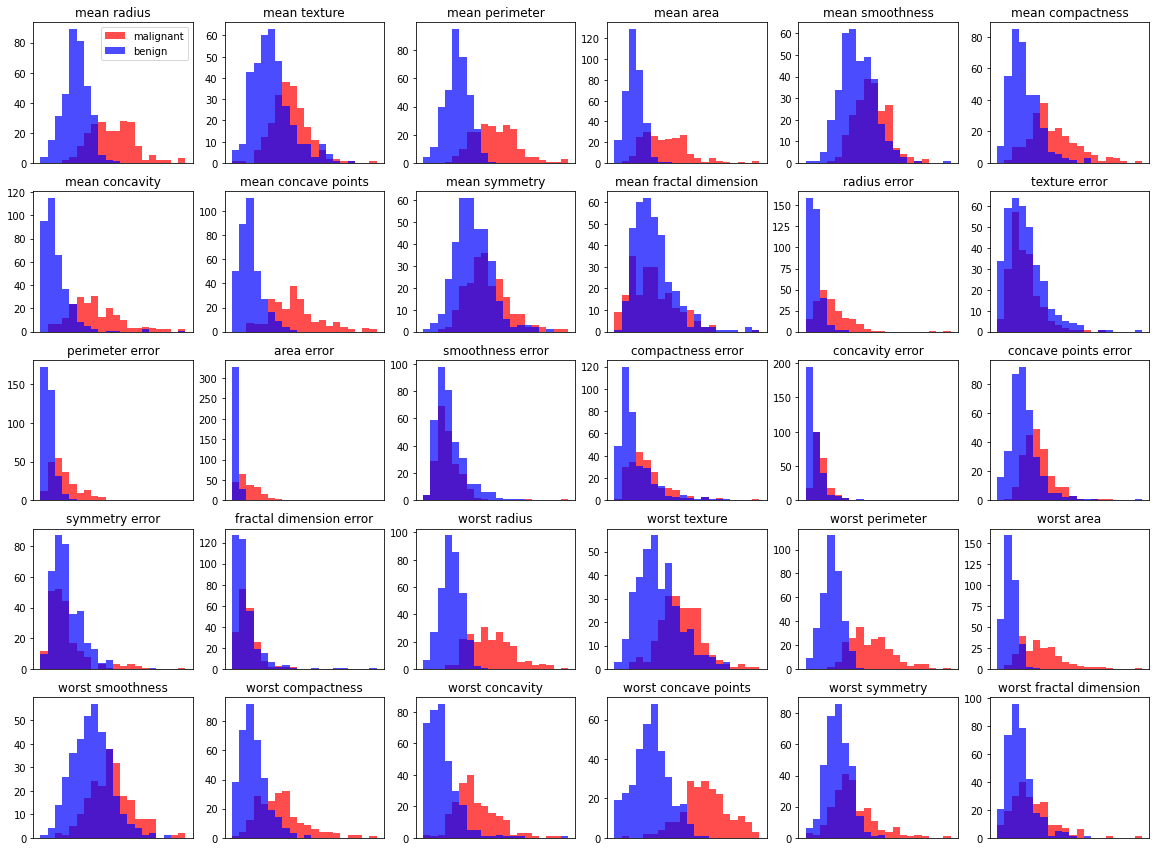

In [10]:
# 30개의 피처 중에 어느 피처를 택하였을 때 malignant와 benign을 분류 잘할까?
# smoothness같이 아예 겹친 경우 영향이 없음 (값이 작든 크든 간 malignant, benign이 다 속함->분류에 도움 안 됨) 

plt.figure(figsize=[20,15])

for col in range(30):
    plt.subplot(5,6,col+1)
    _,bins=np.histogram(cancer.data[:,col], bins=20)
    
    plt.hist(malignant[:,col],color='red',bins=bins,alpha=0.7)
    plt.hist(benign[:,col],color='blue',bins=bins,alpha=0.7)
    plt.title(cancer.feature_names[col])
    if col == 0:
        plt.legend(cancer.target_names)
    plt.xticks([])

In [11]:
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

x_train=x_train_scaled
x_test=x_test_scaled

y_train=tf.keras.utils.to_categorical(y_train,num_classes=2)
y_test=tf.keras.utils.to_categorical(y_test,num_classes=2)

model=tf.keras.Sequential([
    tf.keras.layers.Dense(units=64,activation='relu',input_shape=(30,)),
    tf.keras.layers.Dense(units=32,activation='relu'),
    tf.keras.layers.Dense(units=2,activation='sigmoid')
])

model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.07),loss='binary_crossentropy',metrics=['accuracy'])
model.summary()



Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                1984      
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 66        
Total params: 4,130
Trainable params: 4,130
Non-trainable params: 0
_________________________________________________________________


In [12]:
history=model.fit(x_train,y_train,epochs=25,batch_size=32,validation_split=0.25)

Epoch 1/25
10/10 [==============================] - 2s 115ms/step - loss: 0.4241 - accuracy: 0.8309 - val_loss: 0.1118 - val_accuracy: 0.9626
Epoch 2/25
10/10 [==============================] - 0s 6ms/step - loss: 0.2535 - accuracy: 0.9640 - val_loss: 0.1351 - val_accuracy: 0.9626
Epoch 3/25
10/10 [==============================] - 0s 6ms/step - loss: 0.5030 - accuracy: 0.9155 - val_loss: 0.0302 - val_accuracy: 0.9907
Epoch 4/25
10/10 [==============================] - 0s 6ms/step - loss: 0.5150 - accuracy: 0.9694 - val_loss: 0.0255 - val_accuracy: 0.9907
Epoch 5/25
10/10 [==============================] - 0s 6ms/step - loss: 0.1500 - accuracy: 0.9900 - val_loss: 0.0541 - val_accuracy: 0.9813
Epoch 6/25
10/10 [==============================] - 0s 7ms/step - loss: 0.2173 - accuracy: 0.9718 - val_loss: 0.2411 - val_accuracy: 0.9626
Epoch 7/25
10/10 [==============================] - 0s 6ms/step - loss: 0.1615 - accuracy: 0.9798 - val_loss: 0.0631 - val_accuracy: 0.9720
Epoch 8/25
10/10 [

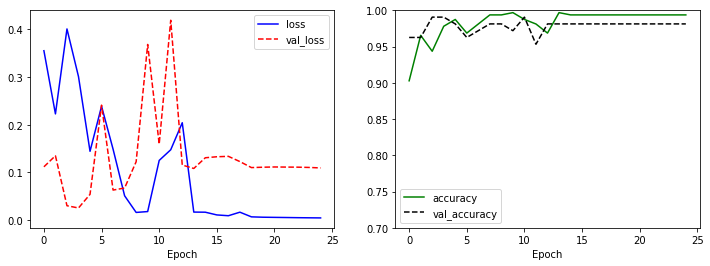

In [13]:
# 다항 분류 모델 학습 결과 시각화
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7,1)
plt.legend()
plt.show()

# epoch 10번 정도하면 괜찮음 (accuracy도 그 때가 제일 높고 loss값도 매우 낮음)

In [15]:
model.predict(x_test)

array([[1.60458213e-09, 1.00000000e+00],
       [1.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 0.00000000e+00],
       [1.12461662e-13, 1.00000000e+00],
       [1.00000000e+00, 0.00000000e+00],
       [7.24226794e-08, 1.00000000e+00],
       [1.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 0.00000000e+00],
       [6.78448373e-08, 1.00000000e+00],
       [1.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 0.00000000e+00],
       [3.16943556e-06, 1.00000000e+00],
       [1.54373701e-11, 1.00000000e+00],
       [6.34285446e-21, 1.00000000e+00],
       [1.59731854e-23, 1.00000000e+00],
       [1.30177748e-12, 1.00000000e+00],
       [1.00000000e+00, 6.10282133e-28],
       [1.00000000e+00, 4.08295836e-12],
       [1.00000000e+00, 0.00000000e+00],
       [4.40011313e-03, 9.98986065e-01],
       [1.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 0.00000000e+00],
       [2.83444067e-20, 1.00000000e+00],
       [7.533151